<a href="https://colab.research.google.com/github/siva4iov/-2022.-CLAIM/blob/master/DA2022.%20Project%20CLAIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Набор данных CLAIM содержит информацию страховой компании о деятельности в сфере автострахования – 10300 строк (количество страховых полисов) и 23 переменные:
* `ID` -  идентификатор страхового полиса
* `Age` – возраст автовладельца
* `Сhildren` – количество детей
* `Сhildren drive` - количество детей с правами
* `Incom` – доход
* `YOJ` – стаж работы автовладельца
* `Gender` – пол
* `Job` - профессия 
* `Edu_level` -  уровень образования
* `Distance` – расстояние от дома до работы страхователя
* `Car_use` -  для какой цели используется автомобиль (по работе или для личных нужд)
* `Vehicle_value` – стоимость автомобиля
* `Vehicle_type` – тип автомобиля
* `Vehicle_age` – возраст автомобиля
* `Clm_freq` -  количество обращений по страховому случаю за последние 10 лет
* `Revoked` –  лишение прав за последние 10 лет
* `MVR_PTC` – количество штрафов автовладельца за последние 10 лет
* `Status` – семейное положение страхователя
* `Area` – тип населенного пункта, в котором проживает страхователь
* `House_value` -  стоимость дома
* `State_code` -  название города
* `Claim_IND` – бинарная переменная (факт обращения по страховому случаю) 
* `Claim_amount` –  сумма, выплаченная по страховому случаю

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("claim_.csv", index_col=0)

In [ ]:
df.head()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,...,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,6.921625e+09,0,67.0,0,14.0,53.841,359229.0,z_No,Mal,Bachelors,...,21.97,Family,0,No,2,294.000,12.0,0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0,26.0,1,13.0,16.999,265527.0,NaN,Fem,z_High School,...,4.01,unknown,4,No,7,292.000,12.0,0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0,71.0,0,17.0,NaN,323918.0,Yes,Mal,<High School,...,15.44,Minivan,0,No,0,387.000,8.0,0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0,68.0,0,NaN,115.546,361705.0,Yes,Fem,PhD,...,18.00,unknown,4,Yes,3,308.000,19.0,0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0,32.0,1,15.0,125.861,70668.0,z_No,Fem,Bachelors,...,17.43,Sports Car,0,No,0,3.221,9.0,1,Highly Urban/ Urban,Bayern


In [ ]:
df.shape

(10300, 23)

In [ ]:
df.describe()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,DISTANCE,VEHICLE_VAL,CLM_FREQ,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND
count,1.030000e+04,10300.000000,10293.000000,10300.000000,9752.000000,9730.000000,9.725000e+03,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,9661.000000,10300.000000
mean,4.536920e+09,0.170000,53.797921,0.720971,13.473954,118.930173,4.168986e+05,78.419417,15.660132,1.808641,3.202621,225.372876,10.297899,0.266602
std,3.054715e+09,0.507381,13.172204,1.116310,4.109358,198.564629,2.356174e+05,15.869675,8.429569,1.528187,2.585899,142.495584,5.713707,0.442204
min,1.130032e+07,0.000000,5.000000,0.000000,3.000000,1.005000,0.000000e+00,50.000000,1.500000,0.000000,0.000000,1.001000,-1.000000,0.000000
25%,2.135318e+09,0.000000,45.000000,0.000000,12.000000,35.819250,2.473380e+05,67.000000,9.200000,0.000000,2.000000,19.621000,3.000000,0.000000
50%,3.964367e+09,0.000000,54.000000,0.000000,14.000000,62.660500,3.886740e+05,78.000000,14.400000,2.000000,3.000000,276.000000,10.000000,0.000000
75%,6.280446e+09,0.000000,63.000000,1.000000,16.000000,101.475500,5.581550e+05,89.000000,20.892500,3.000000,5.000000,321.000000,14.000000,1.000000
max,2.017790e+10,4.000000,103.000000,5.000000,26.000000,968.000000,1.586073e+06,187.000000,69.740000,7.000000,17.000000,996.000000,30.000000,1.000000


In [ ]:
df.describe(include=["O"])

,STATUS,GENDER,EDU_LEVEL,JOB,CAR_USE,VEHICLE_TYPE,REVOKED,AREA,STATE_CODE
count,10298,10300,10300,9635,10300,10300,10300,10300,10300
unique,2,2,5,11,2,8,2,2,10
top,Yes,Fem,z_High School,Teacher,Private,unknown,No,Highly Urban/ Urban,Bayern
freq,6187,5545,2950,2288,6512,2883,9039,8228,5122


In [ ]:
df.isna().sum()

ID                0
CHILD_DRIV        0
AGE               7
CHILDREN          0
YOJ             548
INCOME          570
HOUSE_VAL       575
STATUS            2
GENDER            0
EDU_LEVEL         0
JOB             665
DISTANCE          0
CAR_USE           0
VEHICLE_VAL       0
VEHICLE_TYPE      0
CLM_FREQ          0
REVOKED           0
MVR_PTS           0
CLAIM_AMOUNT      0
VEHICLE_AGE     639
CLAIM_IND         0
AREA              0
STATE_CODE        0
dtype: int64

EDA говорит нам что данные достаточно, полные, кол-во пропусков совершенно незначительно. Ключевые выводы при первом взгляде: 
Целевая переменная смещена(CLAIM_IND) - среднее значение 0.25, значит страховых случаев сильно меньше, если бы это был реальный проект, этот момент следовало бы проработать. Также, присутствует характеристики “Clm_freq”, “Revoked” и “MVR_PTC”, нам дается мало информации об этих фичах, а так следовало бы уточнить что эти данные полученны до факта обращения в страховую, потому что иначе это Data Leakage.

In [ ]:
df.columns

Index(['ID', 'CHILD_DRIV', 'AGE', 'CHILDREN', 'YOJ', 'INCOME', 'HOUSE_VAL',
       'STATUS', 'GENDER', 'EDU_LEVEL', 'JOB', 'DISTANCE', 'CAR_USE',
       'VEHICLE_VAL', 'VEHICLE_TYPE', 'CLM_FREQ', 'REVOKED', 'MVR_PTS',
       'CLAIM_AMOUNT', 'VEHICLE_AGE', 'CLAIM_IND', 'AREA', 'STATE_CODE'],
      dtype='object')

<AxesSubplot:xlabel='AGE'>

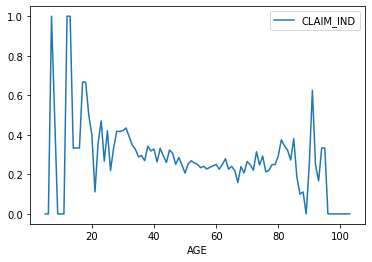

In [ ]:
df[["AGE", "CLAIM_IND"]].groupby("AGE").mean().reset_index().plot(x="AGE", y="CLAIM_IND")


Чем старше водитель, тем меньше страховых случаев, но ближе к 90+ кол-во возрастает, что легко объяснить

<AxesSubplot:xlabel='GENDER'>

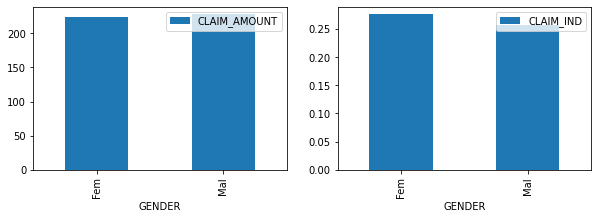

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df.groupby("GENDER").mean().reset_index().plot(x="GENDER", y="CLAIM_AMOUNT", ax=axes[0], kind="bar")
df.groupby("GENDER").mean().reset_index().plot(x="GENDER", y="CLAIM_IND", ax=axes[1], kind="bar", figsize=(10,3))

Связь между целевыми переменами и гендером совершенно минимальна

In [ ]:
car_vals = pd.cut(x=df["VEHICLE_VAL"], bins = (0, 9, 14, 20, 70))

In [ ]:
vals = pd.concat([df[["CLAIM_AMOUNT", "CLAIM_IND"]], car_vals], axis=1)

<AxesSubplot:xlabel='VEHICLE_VAL'>

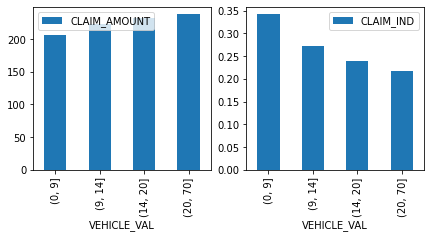

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
vals.groupby("VEHICLE_VAL").mean().reset_index().plot(x="VEHICLE_VAL", y="CLAIM_AMOUNT", ax=axes[0],kind="bar", figsize=(7,3))
vals.groupby("VEHICLE_VAL").mean().reset_index().plot(x="VEHICLE_VAL", y="CLAIM_IND", ax=axes[1], kind="bar")

Интересная связь со стоимостью автомобиля, выплаты не зависят, тем не менее чем дороже автомобиль, тем аккуратнее ездит водитель

In [ ]:
df["VEHICLE_AGE"].describe()

count    9661.000000
mean       10.297899
std         5.713707
min        -1.000000
25%         3.000000
50%        10.000000
75%        14.000000
max        30.000000
Name: VEHICLE_AGE, dtype: float64

<AxesSubplot:xlabel='VEHICLE_AGE'>

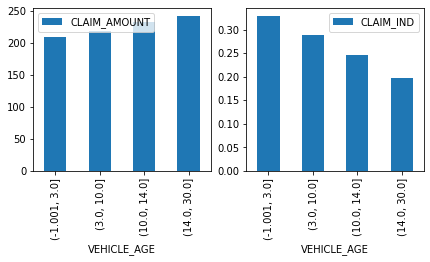

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ages = pd.concat([df[["CLAIM_AMOUNT", "CLAIM_IND"]], pd.qcut(df["VEHICLE_AGE"], q=4)], axis=1)
ages.groupby("VEHICLE_AGE").mean().reset_index().plot(x="VEHICLE_AGE", y="CLAIM_AMOUNT", ax=axes[0],kind="bar", figsize=(7,3))
ages.groupby("VEHICLE_AGE").mean().reset_index().plot(x="VEHICLE_AGE", y="CLAIM_IND", ax=axes[1], kind="bar")


Похожий случай с возрастом автомобиля, я могу только догадываться с чем это связано, возможно чем старше автомобиль, тем чаще в нем возникают неисправности, поэтому лучше ездить тише

<AxesSubplot:xlabel='STATUS'>

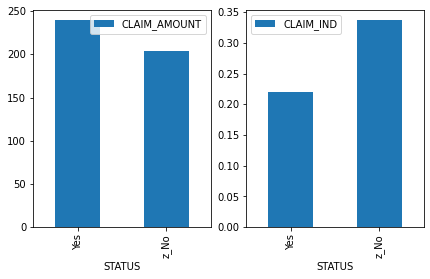

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df.groupby("STATUS").mean().reset_index().plot(x="STATUS", y="CLAIM_AMOUNT", ax=axes[0],kind="bar", figsize=(7,4))
df.groupby("STATUS").mean().reset_index().plot(x="STATUS", y="CLAIM_IND", ax=axes[1], kind="bar")

Женатые люди реже попадают в “страховые случае”, а выплачивают им побольше, это так же можно объяснить логически

<AxesSubplot:>

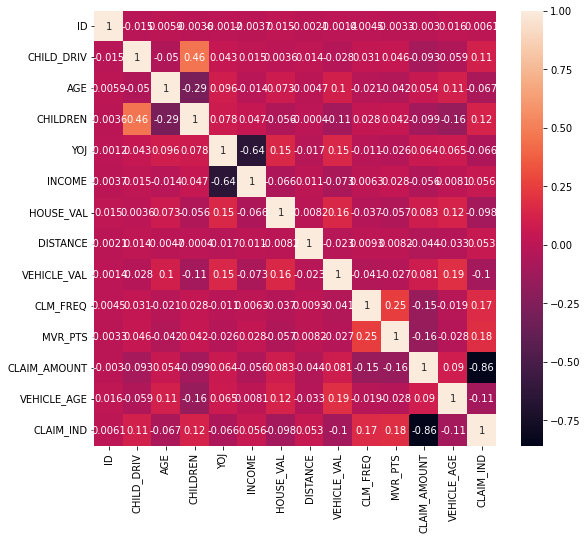

In [ ]:
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(df.corr(), annot=True, ax=ax)


<AxesSubplot:>

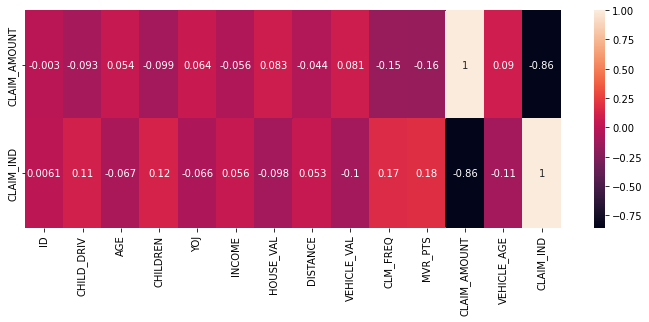

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.heatmap(df.corr().loc[["CLAIM_AMOUNT","CLAIM_IND"]], annot=True, ax=ax)


Самыми значимыми оказываются фичи, связанные с состоянием водителя(доход, стоимость авто\дома)

In [ ]:
X = df.drop(columns=["CLAIM_AMOUNT", "CLAIM_IND", "ID"])
y = df[["CLAIM_AMOUNT", "CLAIM_IND"]]
num_cols = X.select_dtypes(exclude=["object"]).columns
obj_cols = X.select_dtypes(["object"]).columns

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

Для построения и обучения моделей, нам стоит заполнить пропуски, я использую значения медианы для численных значений, и самых частых для категориальных

In [ ]:
imputer = SimpleImputer(strategy="median")
X[num_cols] = imputer.fit_transform(X[num_cols])
imputer = SimpleImputer(strategy="most_frequent")
X[obj_cols] = imputer.fit_transform(X[obj_cols])

In [ ]:
OH = OneHotEncoder(handle_unknown='ignore')
data = OH.fit_transform(X[obj_cols])
cols = OH.get_feature_names()
X = pd.concat([X[num_cols], pd.DataFrame.sparse.from_spmatrix(data, columns=cols)],axis=1)
obj_cols = cols

Я планирую использовать модели, использующие градиентный спуск, поэтому необходимо отмасшатабировать данные

In [ ]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(X)

D:\ProgramData\Anaconda3\envs\coursera_ds\lib\site-packages\sklearn\utils\validation.py:573: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


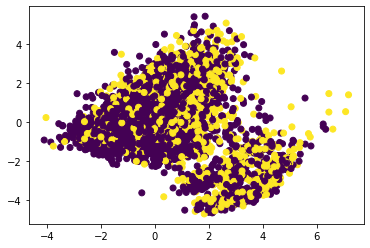

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y["CLAIM_IND"])

Я попробовал применить PCA, чтобы визуализировать весь датасет, а также оценить насколько тяжело будет отделить значения при классификации

С помощью двух компонент, их было бы невозможно отделить. На этой визуализации это не представляется возможным

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.iloc[:,0].to_numpy(), test_size=0.33, random_state=42)

In [ ]:
X

,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,DISTANCE,VEHICLE_VAL,CLM_FREQ,MVR_PTS,...,x8_Bayern,x8_Berlin,x8_Brandenburg,x8_Hessen,x8_Mecklenburg-Vorpomme,x8_Nordrhein-Westfalen,x8_Rheinland-Pfalz,x8_Sachsen,x8_Sachsen-Anhalt,x8_Thueringen
0,-0.33507,1.002647,-0.645883,0.124512,-0.320433,-0.244924,-0.467544,0.748576,-1.183578,-0.465091,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.33507,-2.111177,0.249969,-0.125483,-0.510919,-0.654056,-1.790887,-1.382123,1.434030,1.468566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.33507,1.306435,-0.645883,0.874496,-0.274833,-0.399103,-0.089446,-0.026116,-1.183578,-1.238554,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.33507,1.078594,-0.645883,0.124512,-0.001397,-0.234113,0.162619,0.277592,1.434030,-0.078360,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.33507,-1.655496,0.249969,0.374507,0.051935,-1.504871,0.792782,0.209970,-1.183578,-1.238554,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,1.63593,0.015337,1.145821,-0.375478,0.257549,0.181717,-0.782626,-0.283555,-1.183578,1.081834,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10296,-0.33507,-0.364398,-0.645883,-0.375478,-0.039565,1.412979,0.162619,1.047538,-1.183578,-1.238554,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10297,-0.33507,0.774806,-0.645883,1.124491,-0.389943,-0.348519,-1.349773,-0.218306,0.125226,-1.238554,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10298,-0.33507,0.698859,-0.645883,-0.875467,-0.369221,0.252461,0.162619,0.817385,0.125226,-1.238554,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scores = []
indexes = []

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)

In [ ]:
print("Правильность нa обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность Ha тестовом наборe: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))
scores.append(["{:.2f}".format(lasso.score(X_train, y_train)),"{:.2f}".format(lasso.score(X_test, y_test))])
indexes.append("Lasso")
ind = np.argsort(np.abs(lasso.coef_))[::-1][:3]
print(X.columns[ind])
lasso.coef_[ind]

Правильность нa обучающем наборе: 0.16
Правильность Ha тестовом наборe: 0.16
Количество использованных признаков: 49
Index(['x5_Family', 'x3_Police', 'x7_Highly Urban/ Urban'], dtype='object')


array([129.94197364, 128.364638  , -84.72565076])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, max_depth=5).fit(X_train, y_train)


In [ ]:
print("Правильность нa обучающем наборе: {:.2f}".format(RFR.score(X_train, y_train)))
print("Правильность Ha тестовом наборe: {:.2f}".format(RFR.score(X_test, y_test)))

scores.append(["{:.2f}".format(RFR.score(X_train, y_train)), "{:.2f}".format(RFR.score(X_test, y_test))])
indexes.append("RandomForestRegressor")

ind = np.argsort(np.abs(RFR.feature_importances_))[::-1][:3]
print(X.columns[ind])
RFR.feature_importances_[ind]

Правильность нa обучающем наборе: 0.19
Правильность Ha тестовом наборe: 0.15
Index(['x7_z_Highly Rural/ Rural', 'x2_z_High School',
       'x7_Highly Urban/ Urban'],
      dtype='object')


array([0.14849299, 0.07052702, 0.06905815])

In [ ]:
from sklearn.svm import SVR
svrpoly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)
svrrbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)

In [ ]:
print("Правильность poly нa обучающем наборе: {:.2f}".format(svrpoly.score(X_train, y_train)))
print("Правильность poly Ha тестовом наборe: {:.2f}".format(svrpoly.score(X_test, y_test)))
print("Правильность rbf нa обучающем наборе: {:.2f}".format(svrrbf.score(X_train, y_train)))
print("Правильность rbf Ha тестовом наборe: {:.2f}".format(svrrbf.score(X_test, y_test)))

scores.append(["{:.2f}".format(svrpoly.score(X_train, y_train)), "{:.2f}".format(svrpoly.score(X_test, y_test))])
scores.append(["{:.2f}".format(svrrbf.score(X_train, y_train)), "{:.2f}".format(svrrbf.score(X_test, y_test))])
indexes.append("svrpoly")
indexes.append("svrrbf")

Правильность poly нa обучающем наборе: 0.21
Правильность poly Ha тестовом наборe: 0.12
Правильность rbf нa обучающем наборе: 0.44
Правильность rbf Ha тестовом наборe: 0.09


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score
xgbr = xgb.XGBRegressor(enable_categorical=False, n_estimators=1000, learning_rate=0.01, max_depth=5)
xgbr.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
pred = xgbr.predict(X_train)
res1="{:.2f}".format(r2_score(y_train, pred))
print(f"Правильность нa обучающем наборе: {res1}")
pred = xgbr.predict(X_test)
res2 = "{:.2f}".format(r2_score(y_test, pred))
print(f"Правильность Ha тестовом наборe: {res2}")

scores.append([res1,  res2])
indexes.append("XGBRegressor")


coef=np.array(list((xgbr.get_booster().get_score(importance_type='weight').values())))
ind = np.argsort(np.abs(coef))[::-1][:3]
print(X.columns[ind])
coef[ind]

Правильность нa обучающем наборе: 0.40
Правильность Ha тестовом наборe: 0.17
Index(['AGE', 'VEHICLE_VAL', 'INCOME'], dtype='object')


array([3096., 3029., 2764.])

In [ ]:
np.array(xgbr.get_booster().get_score(importance_type='weight').values())

array(dict_values([803.0, 3096.0, 687.0, 1182.0, 2764.0, 2399.0, 2661.0, 3029.0, 1118.0, 1426.0, 1107.0, 501.0, 86.0, 129.0, 15.0, 87.0, 101.0, 202.0, 141.0, 35.0, 53.0, 250.0, 38.0, 22.0, 60.0, 143.0, 168.0, 398.0, 354.0, 27.0, 117.0, 226.0, 124.0, 89.0, 325.0, 757.0, 223.0, 103.0, 219.0, 89.0, 85.0, 103.0, 72.0, 50.0, 68.0, 143.0]),
      dtype=object)

In [ ]:
scoresc = []
indexesc = []

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.iloc[:,1].to_numpy(), test_size=0.33, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gau = GaussianNB().fit(X_train, y_train)

In [ ]:
print("Правильность нa обучающем наборе: {:.2f}".format(gau.score(X_train, y_train)))
print("Правильность Ha тестовом наборe: {:.2f}".format(gau.score(X_test, y_test)))

scoresc.append(["{:.2f}".format(gau.score(X_train, y_train)), "{:.2f}".format(gau.score(X_test, y_test))])
indexesc.append("GaussianNB")

Правильность нa обучающем наборе: 0.34
Правильность Ha тестовом наборe: 0.35


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [ ]:
print("Правильность нa обучающем наборе: {:.2f}".format(rfc.score(X_train, y_train)))
print("Правильность Ha тестовом наборe: {:.2f}".format(rfc.score(X_test, y_test)))

scoresc.append(["{:.2f}".format(rfc.score(X_train, y_train)), "{:.2f}".format(rfc.score(X_test, y_test))])
indexesc.append("RandomForestClassifier")

ind = np.argsort(np.abs(rfc.feature_importances_))[::-1][:3]
print(X.columns[ind])
rfc.feature_importances_[ind]

Правильность нa обучающем наборе: 1.00
Правильность Ha тестовом наборe: 0.78
Index(['VEHICLE_VAL', 'INCOME', 'HOUSE_VAL'], dtype='object')


array([0.08165559, 0.07823945, 0.07523804])

In [ ]:
from sklearn.svm import SVC
svcpoly = SVC(kernel="poly", C=100, gamma="auto", degree=3, coef0=1).fit(X_train, y_train)
svcrbf = SVC(kernel="rbf", C=100, gamma="auto").fit(X_train, y_train)

In [ ]:
print("Правильность poly нa обучающем наборе: {:.2f}".format(svcpoly.score(X_train, y_train)))
print("Правильность poly Ha тестовом наборe: {:.2f}".format(svcpoly.score(X_test, y_test)))
print("Правильность rbf нa обучающем наборе: {:.2f}".format(svcrbf.score(X_train, y_train)))
print("Правильность rbf Ha тестовом наборe: {:.2f}".format(svcrbf.score(X_test, y_test)))

scoresc.append(["{:.2f}".format(svcpoly.score(X_train, y_train)), "{:.2f}".format(svcpoly.score(X_test, y_test))])
scoresc.append(["{:.2f}".format(svcrbf.score(X_train, y_train)), "{:.2f}".format(svcrbf.score(X_test, y_test))])
indexesc.append("svcpoly")
indexesc.append("svcrbf")


Правильность poly нa обучающем наборе: 0.90
Правильность poly Ha тестовом наборe: 0.75
Правильность rbf нa обучающем наборе: 0.91
Правильность rbf Ha тестовом наборe: 0.75


In [ ]:
from sklearn.metrics import accuracy_score
xgbc = xgb.XGBClassifier(enable_categorical=False, use_label_encoder=False, n_estimators=2000, learning_rate=0.005)
xgbc.fit(X_train, y_train, verbose=True)

[22:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.005, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [ ]:
pred = xgbc.predict(X_train)
res1 = " {:.2f}".format(accuracy_score(y_train, pred))
print(f"Правильность нa обучающем наборе:{res1}")
pred = xgbc.predict(X_test)
res2 = "{:.2f}".format(accuracy_score(y_test, pred))
print(f"Правильность Ha тестовом наборe: {res2} ")

scoresc.append([res1, res2])
indexesc.append("XGBClassifier")


coef=np.array(list((xgbc.get_booster().get_score(importance_type='weight').values())))
ind = np.argsort(np.abs(coef))[::-1][:3]
print(X.columns[ind])
coef[ind]

Правильность нa обучающем наборе: 0.89
Правильность Ha тестовом наборe: 0.79 
Index(['VEHICLE_VAL', 'INCOME', 'HOUSE_VAL'], dtype='object')


array([9806., 9380., 9332.])

In [ ]:
RegResult = pd.DataFrame(data=scores, index=indexes, columns=["Train", "Test"])

In [ ]:
RegResult

,Train,Test
Lasso,0.16,0.16
RandomForestRegressor,0.19,0.15
svrpoly,0.21,0.12
svrrbf,0.44,0.09
XGBRegressor,0.40,0.17


In [ ]:
ClsResult = pd.DataFrame(data=scoresc, index=indexesc, columns=["Train", "Test"])

In [ ]:
ClsResult

,Train,Test
GaussianNB,0.34,0.35
RandomForestClassifier,1.00,0.78
svcpoly,0.90,0.75
svcrbf,0.91,0.75
XGBClassifier,0.89,0.79


In [ ]:
df["amount"] = df[['VEHICLE_VAL', 'INCOME', 'HOUSE_VAL']].sum(axis=1)

In [ ]:
pd.concat([df["CLAIM_IND"], pd.qcut(df["amount"], q=4)], axis=1).groupby("amount").mean()

,CLAIM_IND
amount,
"(3.629, 221855.78]",0.322330
"(221855.78, 371055.74]",0.279223
"(371055.74, 545855.032]",0.245437
"(545855.032, 1586506.56]",0.219417
